In [156]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# 1

In [2]:
#a
df=pd.read_csv("usl.csv")
df

,"TB prevalence, all forms (per 100 000 population per year)",1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,class
0,Slovakia,55,56,59,59,56,51,46,42,38,35,32,30,29,26,25,21,20,20,1
1,Burkina Faso,179,196,208,221,233,246,251,271,286,308,338,368,398,419,426,421,411,403,2
2,Kyrgyzstan,90,93,93,93,101,118,141,165,147,146,156,169,153,145,139,136,135,134,1
3,Oman,40,36,29,25,22,22,15,15,14,14,13,14,13,13,12,13,13,14,1
4,Sweden,5,5,6,6,5,5,5,4,4,4,4,4,4,4,4,4,4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Senegal,380,379,379,378,377,376,372,388,397,424,420,430,443,441,454,456,461,468,2
146,Zambia,436,456,494,526,556,585,602,626,634,657,658,680,517,478,468,453,422,387,0
147,Suriname,109,100,79,80,76,78,88,101,118,122,115,113,113,120,126,136,146,155,1
148,Pakistan,430,428,427,426,424,422,421,421,415,420,413,406,376,355,333,289,260,223,2


In [3]:
#b
df.describe()

,1996,1997,1998,1999,2000,2001,2002,2003,class
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,183.493333,185.880000,183.573333,186.826667,184.520000,185.500000,186.553333,184.326667,1.166667
std,192.801033,193.767865,189.695989,197.930933,202.723329,209.753795,210.561363,215.452777,0.560640
min,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,4.000000,0.000000,0.000000
25%,34.250000,30.750000,30.250000,28.500000,27.000000,25.250000,26.250000,24.250000,1.000000
50%,91.000000,93.000000,89.500000,90.500000,87.500000,82.000000,81.000000,71.500000,1.000000
75%,319.500000,329.250000,337.750000,348.500000,342.500000,343.750000,354.750000,347.500000,1.750000
max,910.000000,853.000000,698.000000,701.000000,761.000000,832.000000,932.000000,960.000000,2.000000


In [4]:
df.median()

1996     91.0
1997     93.0
1998     89.5
1999     90.5
2000     87.5
2001     82.0
2002     81.0
2003     71.5
class     1.0
dtype: float64

In [9]:
#c
df.columns
    

Index(['TB prevalence, all forms (per 100 000 population per year)', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       'class'],
      dtype='object')

In [12]:
((df['class'].value_counts())/150)*100

1    66.000000
2    25.333333
0     8.666667
Name: class, dtype: float64

the only catagorical variable is class.

In [15]:
#d
df.corr()

,1996,1997,1998,1999,2000,2001,2002,2003,class
1996,1.000000,0.988894,0.972385,0.953888,0.938888,0.926413,0.906192,0.884035,0.049713
1997,0.988894,1.000000,0.988906,0.968048,0.955437,0.944078,0.905250,0.904253,0.061039
1998,0.972385,0.988906,1.000000,0.980995,0.976141,0.963719,0.927620,0.932887,0.086813
1999,0.953888,0.968048,0.980995,1.000000,0.985584,0.977584,0.949163,0.950651,0.115115
2000,0.938888,0.955437,0.976141,0.985584,1.000000,0.992968,0.956603,0.966929,0.104815
2001,0.926413,0.944078,0.963719,0.977584,0.992968,1.000000,0.962556,0.975437,0.091914
2002,0.906192,0.905250,0.927620,0.949163,0.956603,0.962556,1.000000,0.976674,0.127928
2003,0.884035,0.904253,0.932887,0.950651,0.966929,0.975437,0.976674,1.000000,0.153175
class,0.049713,0.061039,0.086813,0.115115,0.104815,0.091914,0.127928,0.153175,1.000000


In [16]:
df.cov()

,1996,1997,1998,1999,2000,2001,2002,2003,class
1996,37172.238210,36943.724027,35563.601163,36401.602864,36696.688054,37464.832215,36788.161432,36722.388098,5.373602
1997,36943.724027,37545.985503,36349.203490,37127.213960,37530.780940,38370.691275,36934.227919,37750.583087,6.630872
1998,35563.601163,36349.203490,35984.568412,36833.147025,37538.290470,38345.838926,37051.579955,38127.603400,9.232662
1999,36401.602864,37127.213960,36833.147025,39176.654318,39546.761879,40586.140940,39557.881790,40540.312036,12.774049
2000,36696.688054,37530.780940,37538.290470,39546.761879,41096.747919,42222.986577,40833.274094,42232.835705,11.912752
2001,37464.832215,38370.691275,38345.838926,40586.140940,42222.986577,43996.654362,42512.298658,44081.963087,10.808725
2002,36788.161432,36934.227919,37051.579955,39557.881790,40833.274094,42512.298658,44336.087740,44307.831454,15.101790
2003,36722.388098,37750.583087,38127.603400,40540.312036,42232.835705,44081.963087,44307.831454,46419.899284,18.502237
class,5.373602,6.630872,9.232662,12.774049,11.912752,10.808725,15.101790,18.502237,0.314318


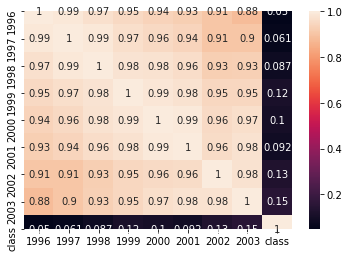

In [17]:
#e
sns.heatmap(df.corr(), annot=True)

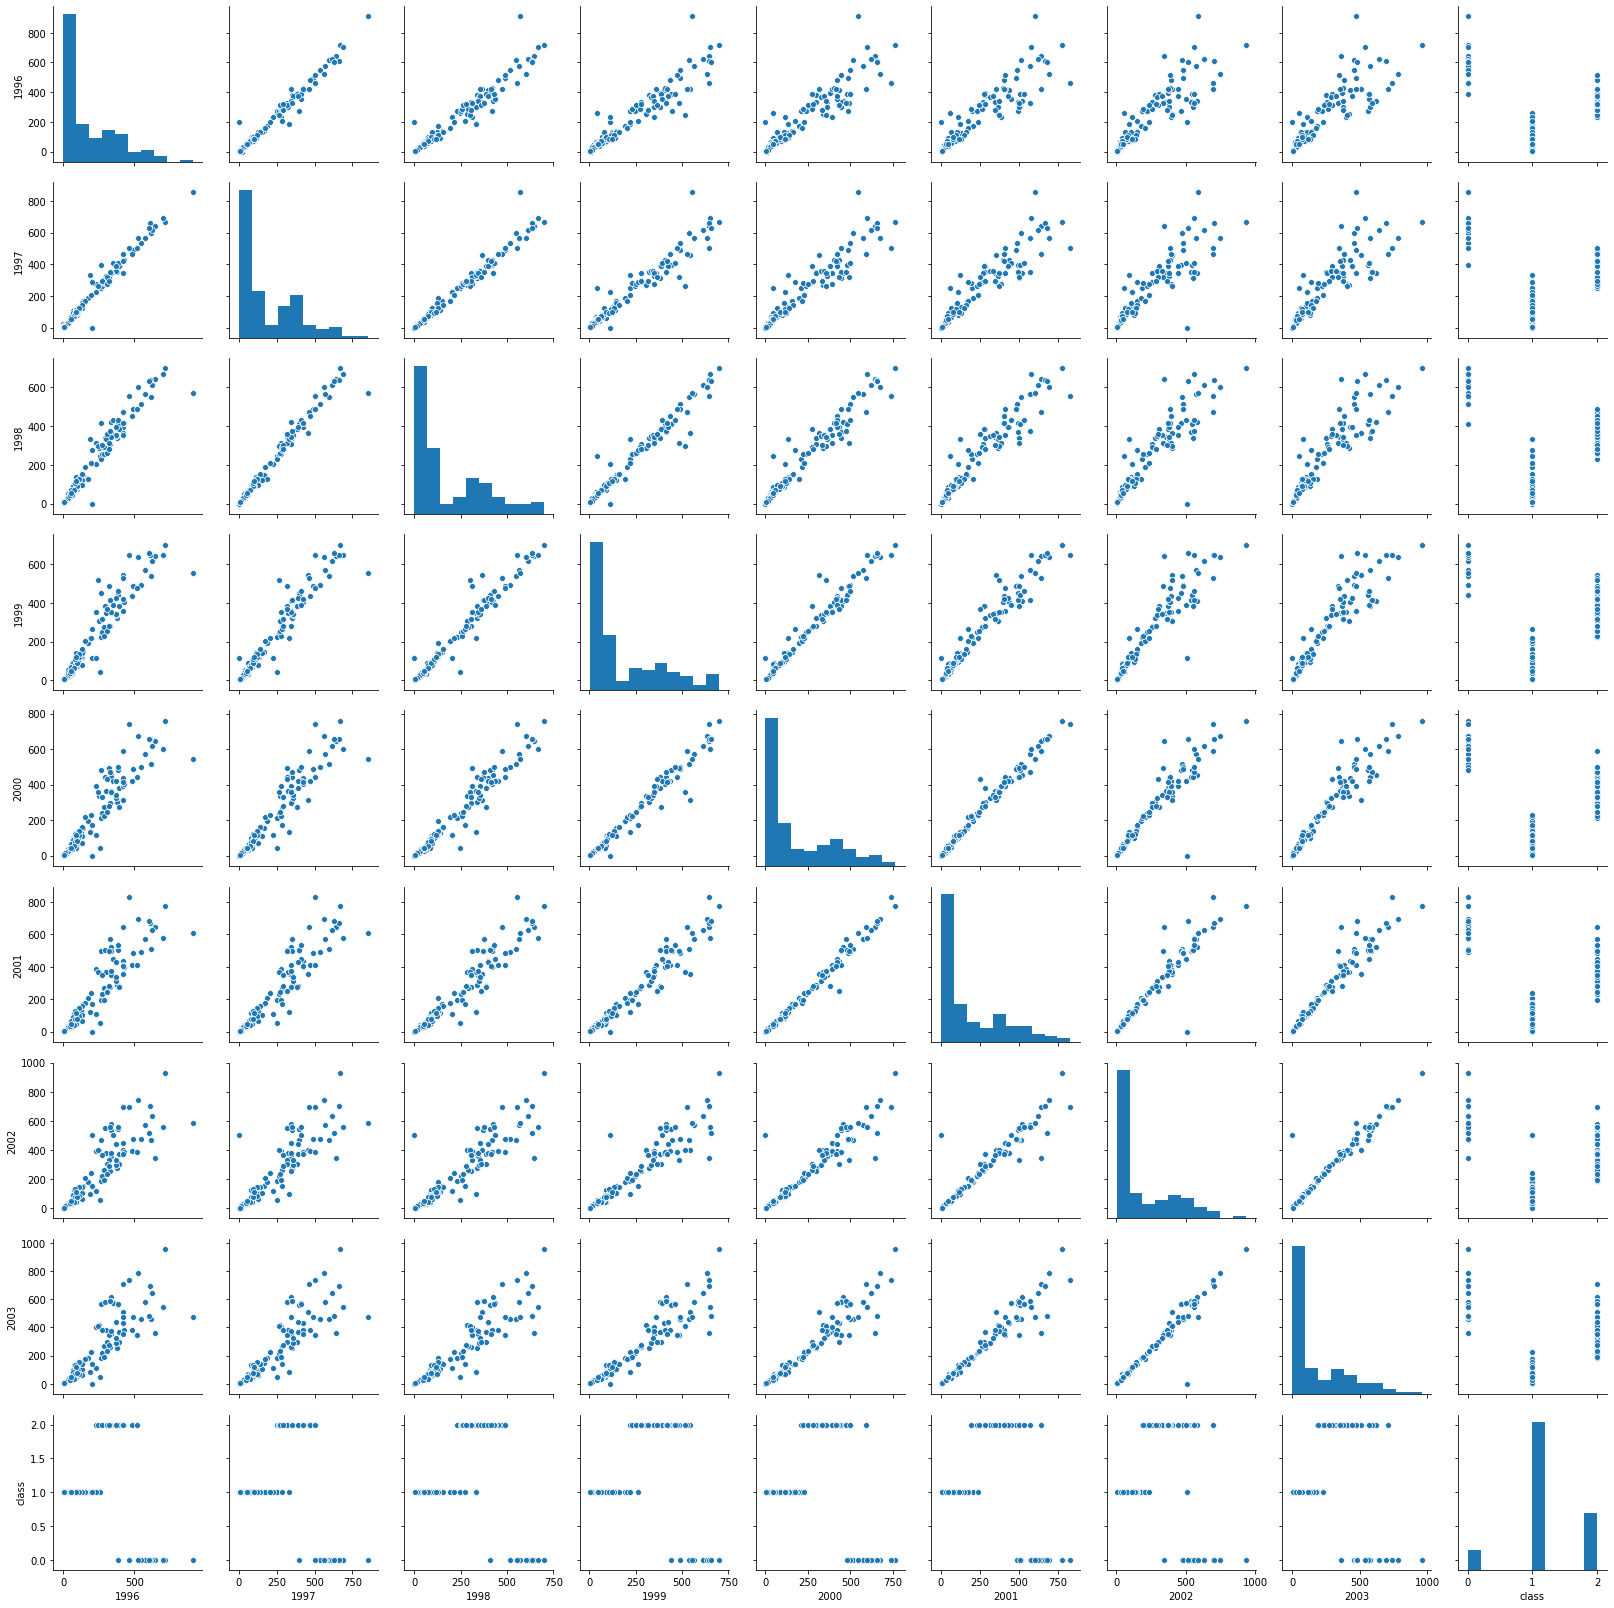

In [18]:
sns.pairplot(df)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 20 columns):
TB prevalence, all forms (per 100 000 population per year)    150 non-null object
1990                                                          150 non-null object
1991                                                          150 non-null object
1992                                                          150 non-null object
1993                                                          150 non-null object
1994                                                          150 non-null object
1995                                                          150 non-null object
1996                                                          150 non-null int64
1997                                                          150 non-null int64
1998                                                          150 non-null int64
1999                                                          150 non-null int

# 2

#a
The correlation matrix is only showing few dimensions in the data set excluding other dimensions. This can be considered as clue that defines the usabiity of PCA which is that  principal component analysis is a method of extracting important variables (in form of components) from a large set of variables available in a data set.

In [26]:
#b
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore


In [64]:
X = df.drop('TB prevalence, all forms (per 100 000 population per year)', 1)

X_std = StandardScaler().fit_transform(X)

In [63]:
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00680272 1.00284418 0.99663537 0.99229297 0.98503314 0.97463122
  0.95150288 0.93593257 0.92326661 0.8945676  0.8834168  0.85638864
  0.81650767 0.80313944 0.78825345 0.77526622 0.77356205 0.75813093
  0.08383375]
 [1.00284418 1.00680272 1.00451767 1.00177789 0.99285168 0.98857148
  0.96529443 0.95117571 0.94013922 0.90729831 0.89696153 0.87259121
  0.83535917 0.82378884 0.81153319 0.79833053 0.79692326 0.77822492
  0.09836177]
 [0.99663537 1.00451767 1.00680272 1.00449026 0.99756169 0.99522493
  0.97286394 0.96225823 0.95186285 0.91762337 0.90612189 0.88221748
  0.84600732 0.83475366 0.82222076 0.8093638  0.80716212 0.78800267
  0.10832845]
 [0.99229297 1.00177789 1.00449026 1.00680272 1.00237144 1.00204241
  0.98085086 0.9684768  0.95897852 0.92846014 0.91925475 0.89647665
  0.86236994 0.85219613 0.83950519 0.82688555 0.82387004 0.80460261
  0.1225668 ]
 [0.98503314 0.99285168 0.99756169 1.00237144 1.00680272 1.00221062
  0.98317537 0.97249346 0.96453129 0.9

In [65]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [66]:
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-2.26663442e-01  2.84488863e-01  1.71069284e-01 -3.00799617e-01
   9.96446168e-02 -2.85212843e-01  3.27362754e-01 -3.79853339e-01
  -1.74076319e-02 -1.76715280e-01  2.87568466e-01 -2.42786346e-02
  -2.75520963e-01 -2.15462889e-01 -2.33300889e-01 -6.70855863e-02
  -2.33726067e-01 -1.87034939e-01 -1.39721661e-01]
 [-2.30317089e-01  2.61552253e-01  1.64129958e-01 -2.70466125e-01
   8.12947745e-02 -4.58447065e-02  1.04100519e-01 -2.23738145e-01
  -8.94286028e-02  7.39604008e-03 -1.77761864e-01  9.14450302e-02
   7.23379592e-01  2.82214976e-01  9.18392161e-02  6.98182443e-02
   1.99457756e-01 -6.64754001e-02  1.99813676e-02]
 [-2.32193259e-01  2.46722597e-01  1.61217186e-01 -1.79179275e-01
   5.42598268e-02  6.60960100e-02 -1.86914450e-02 -5.82434027e-02
   3.38719371e-02  2.72275927e-01 -2.94391233e-01 -1.51296899e-01
  -2.48701125e-01 -4.40135870e-01  3.60578738e-01  1.09133739e-01
   1.96893901e-01  3.59411352e-01  2.56480764e-01]
 [-2.34569961e-01  2.21361087e-01  1.

In [67]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

In [68]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 87.62009519  94.10018516  98.46988721  99.05592957  99.33430379
  99.5593245   99.7027542   99.79947147  99.86264742  99.90624251
  99.940334    99.96106361  99.97230132  99.98113057  99.98811318
  99.99499609  99.99814042  99.99938774 100.        ]


In [92]:
var_exp

[87.62009518525025,
 6.480089972394152,
 4.3697020506549755,
 0.5860423600072772,
 0.2783742205800588,
 0.22502071051400144,
 0.14342969656068438,
 0.09671727205964709,
 0.06317594824873222,
 0.04359509530387013,
 0.034091484239086325,
 0.02072961712009127,
 0.01123770284807975,
 0.008829258507774133,
 0.006982606884179821,
 0.0068829088040264575,
 0.0031443320638998204,
 0.0012473226376249961,
 0.0006122553216088562]

In [97]:
len(cum_var_exp[cum_var_exp > 95])

17

Hence the number of componennts to be used to deterimine that 95 % variance of the data can be explained is 3  

In [168]:
pca1 = PCA(n_components=2).fit_transform(X)
pca1

array([[-7.78147798e-01,  3.78132552e-01],
       [-9.35090313e-01, -1.37007280e-01],
       [-1.15130764e+00,  4.53387267e-02],
       [-1.24248065e+00, -6.27699381e-02],
       [-8.86256463e-01,  4.69305555e-01],
       [-5.13096618e-01,  8.02099381e-01],
       [-1.26788414e+00,  2.36152565e-01],
       [-8.69320802e-01,  2.70023887e-01],
       [-1.42482665e+00, -2.78987268e-01],
       [-9.43558144e-01, -3.73664462e-02],
       [-4.96160957e-01,  6.02817712e-01],
       [-1.06860247e+00,  2.53088226e-01],
       [-1.03473115e+00, -1.45475111e-01],
       [-1.53293532e+00, -1.87814264e-01],
       [-1.23001111e-01,  9.35611537e-01],
       [-2.56513268e-01,  1.32570704e+00],
       [-5.13096618e-01,  8.02099381e-01],
       [-7.78147798e-01,  3.78132552e-01],
       [-2.05706284e-01,  7.27862038e-01],
       [-8.03551290e-01,  6.77055055e-01],
       [-4.70757465e-01,  3.03895210e-01],
       [-7.95083459e-01,  5.77414220e-01],
       [-1.28481980e+00,  4.35434233e-01],
       [-7.

# 3

In [104]:
#a
df=df.drop('TB prevalence, all forms (per 100 000 population per year)',1)
df

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,class
0,55,56,59,59,56,51,46,42,38,35,32,30,29,26,25,21,20,20,1
1,179,196,208,221,233,246,251,271,286,308,338,368,398,419,426,421,411,403,2
2,90,93,93,93,101,118,141,165,147,146,156,169,153,145,139,136,135,134,1
3,40,36,29,25,22,22,15,15,14,14,13,14,13,13,12,13,13,14,1
4,5,5,6,6,5,5,5,4,4,4,4,4,4,4,4,4,4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,380,379,379,378,377,376,372,388,397,424,420,430,443,441,454,456,461,468,2
146,436,456,494,526,556,585,602,626,634,657,658,680,517,478,468,453,422,387,0
147,109,100,79,80,76,78,88,101,118,122,115,113,113,120,126,136,146,155,1
148,430,428,427,426,424,422,421,421,415,420,413,406,376,355,333,289,260,223,2


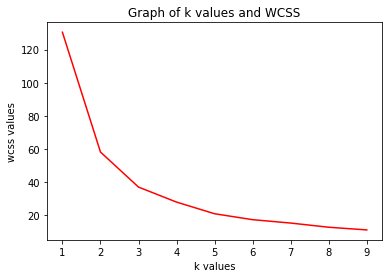

In [126]:
from sklearn.cluster import KMeans

wcss = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca1)
    wcss.append(kmeans.inertia_)
    
# Visualization of k values:

plt.plot(range(1,10), wcss, color='red')
plt.title('Graph of k values and WCSS')
plt.xlabel('k values')
plt.ylabel('wcss values')
plt.show()

optimal k value from the elbow graph is 3

In [131]:
#b
# Now we know our best k value is 3, I am creating a new kmeans model:
kmeans2 = KMeans(n_clusters=3)

# Training the model:
clusters = kmeans2.fit_predict(df)

# Adding a label feature with the predicted class values:
df_k = df.copy(deep=True)
df_k['label'] = clusters

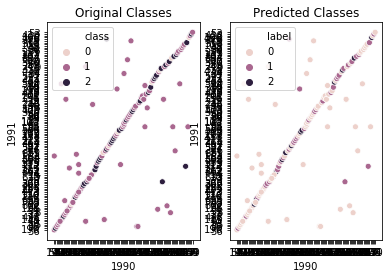

In [132]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1 = plt.subplot(1,2,1)
plt.title('Original Classes')
sns.scatterplot(x='1990', y='1991', hue='class', data=df, ax=ax1)

ax2 = plt.subplot(1,2,2)
plt.title('Predicted Classes')
sns.scatterplot(x='1990', y='1991', hue='label', data=df_k, ax=ax2)
plt.show()

In [133]:
#c
print('Original Data Classes:')
print(df['class'].value_counts())
print('-' * 30)
print('Predicted Data Classes:')
print(df_k.label.value_counts())

Original Data Classes:
1    99
2    38
0    11
Name: class, dtype: int64
------------------------------
Predicted Data Classes:
0    98
1    37
2    13
Name: label, dtype: int64


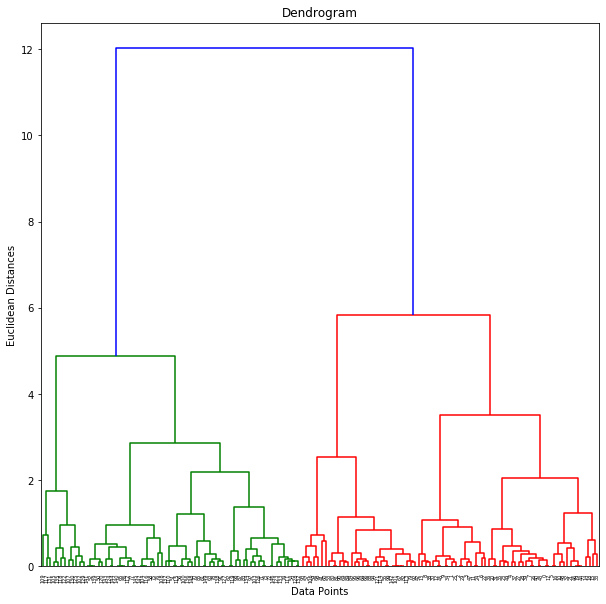

In [135]:
from scipy.cluster.hierarchy import linkage, dendrogram
plt.figure(figsize=[10,10])
merg = linkage(pca1, method='ward')
dendrogram(merg, leaf_rotation=90)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

In [137]:
from sklearn.cluster import AgglomerativeClustering

hie_clus = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster2 = hie_clus.fit_predict(df)

df_h = df.copy(deep=True)
df_h['label'] = cluster2

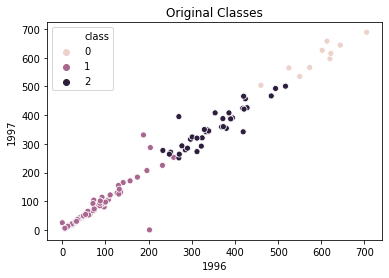

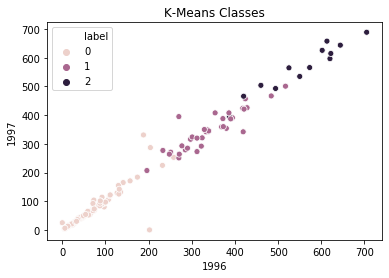

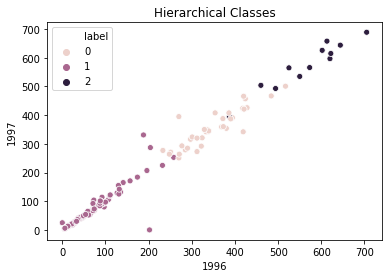

In [140]:
plt.title('Original Classes')
sns.scatterplot(x='1996', y='1997', hue='class', data=df)
plt.show()
plt.title('K-Means Classes')
sns.scatterplot(x='1996', y='1997', hue='label', data=df_k)
plt.show()
plt.title('Hierarchical Classes')
sns.scatterplot(x='1996', y='1997', hue='label', data=df_h)
plt.show()

In [142]:
print('Original Data Classes:')
print(df['class'].value_counts())
print('-' * 30)
print('K-Means Predicted Data Classes:')
print(df_k.label.value_counts())
print('-' * 30)
print('Hierarchical Predicted Data Classes:')
print(df_h.label.value_counts())

Original Data Classes:
1    99
2    38
0    11
Name: class, dtype: int64
------------------------------
K-Means Predicted Data Classes:
0    98
1    37
2    13
Name: label, dtype: int64
------------------------------
Hierarchical Predicted Data Classes:
1    99
0    37
2    12
Name: label, dtype: int64


# 4

In [147]:
#a
x=df.drop('class', 1)
y=df['class']

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=5)

#c
For a supervised learning problem PCA  extracts low dimensional set of features from a high dimensional data set with a motive to capture as much information as possible.
- With fewer variables, visualization also becomes much more meaningful.
- PCA is more useful when dealing with 3 or higher dimensional data.

In [150]:
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(x_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [152]:
y_pred_DT = model.predict(x_test)

In [153]:
cm_DT= confusion_matrix(y_test, y_pred_DT)
cm_DT

array([[ 1,  0,  1],
       [ 0, 30,  1],
       [ 3,  3,  6]], dtype=int64)

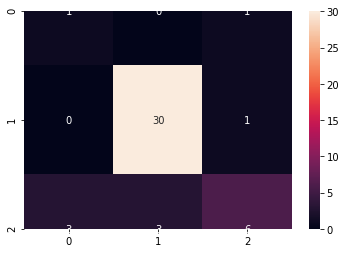

In [154]:
sns.heatmap(cm_DT, annot=True)
plt.show()

In [157]:
classification=classification_report(y_test,y_pred_DT)
print(classification)

              precision    recall  f1-score   support

           0       0.25      0.50      0.33         2
           1       0.91      0.97      0.94        31
           2       0.75      0.50      0.60        12

    accuracy                           0.82        45
   macro avg       0.64      0.66      0.62        45
weighted avg       0.84      0.82      0.82        45



In [159]:
ac = accuracy_score(y_test, y_pred_DT)
print("Accuracy Score:", ac)

Accuracy Score: 0.8222222222222222


Now let's try to implement classifier by changing the data with PCA which is alredy done in above lines. 

So the changes that were best made to improve and re-fit the model is by implementing PCA on the model

In [167]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [172]:
from sklearn.decomposition import PCA
pca = PCA()
x_train_2 = pca.fit_transform(x_train)
x_test_2 = pca.transform(x_test)

In [173]:
explained_variance = pca.explained_variance_ratio_  
explained_variance

array([9.30453284e-01, 5.43990846e-02, 5.55015890e-03, 4.11985362e-03,
       2.04187002e-03, 1.19931084e-03, 9.92278835e-04, 3.93349358e-04,
       2.85234456e-04, 1.63296597e-04, 1.23715903e-04, 1.12124489e-04,
       8.63337535e-05, 4.07787336e-05, 2.15448636e-05, 1.12368967e-05,
       5.43539169e-06, 1.10901314e-06])

In [175]:
from sklearn import tree
model2=tree.DecisionTreeClassifier()
model2.fit(x_train_2,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [177]:
y_pred_DT_2 = model2.predict(x_test_2)

In [178]:
from sklearn.metrics import confusion_matrix
cm_PCA= confusion_matrix(y_test, y_pred_DT_2)
cm_PCA

array([[ 2,  0,  0],
       [ 0, 31,  0],
       [ 1,  0, 11]], dtype=int64)

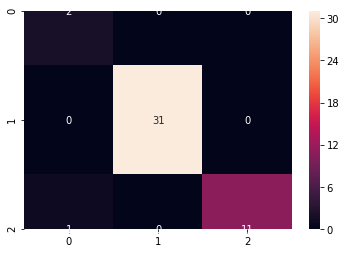

In [180]:
sns.heatmap(cm_PCA, annot=True)
plt.show()

In [182]:
classification=classification_report(y_test,y_pred_DT)
print(classification)

              precision    recall  f1-score   support

           0       0.25      0.50      0.33         2
           1       0.91      0.97      0.94        31
           2       0.75      0.50      0.60        12

    accuracy                           0.82        45
   macro avg       0.64      0.66      0.62        45
weighted avg       0.84      0.82      0.82        45



In [183]:
ac_PCA = accuracy_score(y_test, y_pred_DT_2)
print("Accuracy Score:", ac_PCA)

Accuracy Score: 0.9777777777777777


# Thus i built the best fit accuracy model of 97.78 %

# 5

The overall fit of the model has been improved after applying PCA and the reason to chose only the Decision tree classifer instead of other classification model to avoid not implementing ensemble methods and to provie A VALID EXAMPLE OF USING PCA AND HOW IT IMPROVES ACCURACY OF A WEEK NON PARAMETRIC MODEL like Decision Tree classifier.

The best business interpretation of the model is that only that the model has redundant features which were reducing the accuracy however, after taking low dimensional features with maximum information gain and reducing noise by removing unnecessary features the model accuracy has been improved

So the changes that were best made to improve and re-fit the model is by implementing PCA on the model as proved above